# Exploratory data analysis in Python.

*Apa yang dimaksud dengan Exploratory Data Analysis?*

Exploratory Data Analysis(EDA) adalah memahami kumpulan data dengan meringkas karakteristik utamanya dan sering kali memplotnya secara visual. Langkah ini sangat penting terutama ketika kita sampai pada pemodelan data untuk menerapkan Machine learning. Plotting dalam EDA terdiri dari Histogram, Box plot, Scatter plot, dan masih banyak lagi. Seringkali dibutuhkan banyak waktu untuk mengeksplorasi data. Melalui proses EDA, kita dapat meminta untuk mendefinisikan pernyataan masalah atau definisi pada kumpulan data kita yang sangat penting.

## 1. Importing the required libraries for EDA

Di bawah ini adalah library yang digunakan untuk melakukan Exploratory Data Analysis (EDA) dalam tutorial ini.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

## 2. Loading the data into the data frame.

In [ ]:
df = pd.read_csv("/content/laptopPrice.csv")
# To display the top 5 rows
df.head(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [ ]:
df.tail(5)                        # To display the botton 5 rows

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0
822,Lenovo,AMD,Ryzen 5,10th,8 GB,DDR4,512 GB,0 GB,DOS,64-bit,0 GB,ThinNlight,No warranty,No,No,57490,4 stars,18,4


## 3. Checking the types of data

Di sini kita memeriksa tipe data karena terkadang harga tersebut akan disimpan sebagai string, jika dalam kasus ini, kita harus mengubah string tersebut menjadi data integer baru kita dapat memplot datanya melalui grafik. Di sini, dalam kasus ini, data sudah dalam format integer jadi tidak perlu khawatir.

In [ ]:
df.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

## 4. Dropping irrelevant columns

Langkah ini tentu saja diperlukan dalam setiap EDA karena terkadang akan ada banyak kolom yang tidak pernah kita gunakan dalam kasus seperti itu, sehingga menghapusnya adalah satu-satunya solusi. Dalam kasus ini, kolom-kolom seperti processor_gnrtn, graphic_card_gb, weight,	warranty,	Touchscreen,	msoffice, rating,	Number of Ratings,	Number of Reviews akan saya hapus saja.

In [ ]:
df = df.drop(['processor_gnrtn', 'graphic_card_gb', 'weight',	'warranty',	'Touchscreen',	'msoffice', 'rating',	'Number of Ratings',	'Number of Reviews'], axis=1)
df.head(5)

,brand,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,Price
0,ASUS,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,34649
1,Lenovo,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,38999
2,Lenovo,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,39999
3,ASUS,Intel,Core i5,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,69990
4,ASUS,Intel,Celeron Dual,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,26990


## 5. Renaming the columns

Dalam hal ini, sebagian besar nama kolom sangat membingungkan untuk dibaca, jadi saya hanya mengubah nama kolomnya. Ini adalah pendekatan yang bagus untuk meningkatkan keterbacaan kumpulan data.

In [ ]:
df = df.rename(columns={"brand": "Brand", "processor_brand": "Processor Brand", "processor_name": "Processor Name", "ram_gb": "RAM GB","ram_type": "RAM Type", "ssd": "SSD", "hdd": "HDD","os": "OS", "os_bit": "OS Bit"})
df.head(5)

,Brand,Processor Brand,Processor Name,RAM GB,RAM Type,SSD,HDD,OS,OS Bit,Price
0,ASUS,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,34649
1,Lenovo,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,38999
2,Lenovo,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,39999
3,ASUS,Intel,Core i5,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,69990
4,ASUS,Intel,Celeron Dual,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,26990


## 6. Dropping the duplicate rows

Ini sering kali merupakan hal yang berguna untuk dilakukan karena kumpulan data yang sangat besar sering kali memiliki beberapa data duplikat yang mungkin mengganggu, jadi di sini saya menghapus semua nilai duplikat dari kumpulan data. Sebagai contoh sebelum menghapus saya memiliki 823 baris data tetapi setelah menghapus duplikat 757 data yang berarti saya memiliki 66 data duplikat.

In [ ]:
df.shape

(823, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (66, 10)


Sekarang mari kita hapus data duplikat karena tidak masalah untuk menghapusnya.

In [ ]:
df.count()      # Used to count the number of rows

Brand              823
Processor Brand    823
Processor Name     823
RAM GB             823
RAM Type           823
SSD                823
HDD                823
OS                 823
OS Bit             823
Price              823
dtype: int64

Jadi terlihat di atas ada 823 baris dan kami menghapus 66 baris data duplikat.

In [ ]:
df = df.drop_duplicates()
df.head(5)

,Brand,Processor Brand,Processor Name,RAM GB,RAM Type,SSD,HDD,OS,OS Bit,Price
0,ASUS,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,34649
1,Lenovo,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,38999
2,Lenovo,Intel,Core i3,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,39999
3,ASUS,Intel,Core i5,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,69990
4,ASUS,Intel,Celeron Dual,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,26990


In [ ]:
df.count()

Brand              757
Processor Brand    757
Processor Name     757
RAM GB             757
RAM Type           757
SSD                757
HDD                757
OS                 757
OS Bit             757
Price              757
dtype: int64

## 7. Dropping the missing or null values.

Ini sebagian besar mirip dengan langkah sebelumnya, tetapi di sini semua nilai yang terdeteksi *kosong* akan dibuang nanti.

In [ ]:
print(df.isnull().sum())

Brand              0
Processor Brand    0
Processor Name     0
RAM GB             0
RAM Type           0
SSD                0
HDD                0
OS                 0
OS Bit             0
Price              0
dtype: int64


Sekarang kita tidak akan menghapus apapun, karena di antara semua baris tidak ada data yang berisi nilai *null*

## 8. Detecting Outliers

Outlier adalah sebuah titik atau sekumpulan titik yang berbeda dari titik-titik lainnya. Kadang-kadang, titik-titik tersebut bisa sangat tinggi atau sangat rendah. Sering kali merupakan ide yang baik untuk mendeteksi dan menghapus outlier. Karena outlier adalah salah satu alasan utama untuk menghasilkan model yang kurang akurat. Oleh karena itu, merupakan ide yang baik untuk menghapusnya. Deteksi dan penghapusan outlier yang akan saya lakukan disebut teknik skor IQR. Seringkali outlier dapat dilihat dengan visualisasi menggunakan box plot. Di bawah ini adalah box plot Price. Pada semua plot tersebut, Anda dapat menemukan beberapa titik yang berada di luar kotak yang tidak lain adalah outlier.

<Axes: xlabel='Price'>

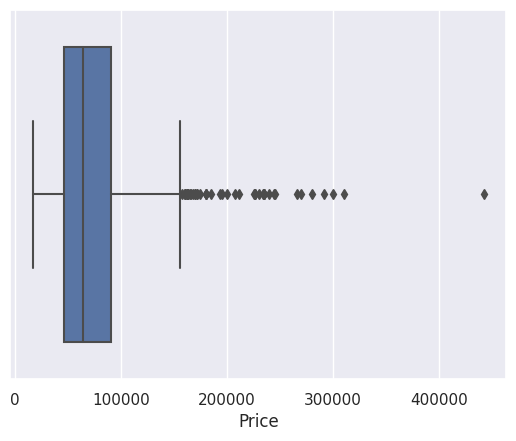

In [ ]:
sns.boxplot(x=df['Price'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Price    44200.0
dtype: float64


<ipython-input-14-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-14-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


Jangan khawatir tentang nilai-nilai di atas karena tidak penting untuk mengetahui setiap nilai tersebut, yang penting adalah mengetahui bagaimana cara menggunakan teknik ini untuk menghilangkan pencilan.

In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-15-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(713, 10)

Seperti yang terlihat di atas, ada sekitar 40 baris yang merupakan pencilan. Tetapi kita tidak dapat sepenuhnya menghapus pencilan karena bahkan setelah menggunakan teknik di atas, mungkin masih ada 1-2 pencilan yang belum dihilangkan.

## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram mengacu pada frekuensi kemunculan variabel dalam suatu interval. Dalam kasus ini, terdapat 10 jenis laptop, namun seringkali penting untuk mengetahui siapa yang memiliki jumlah laptop terbanyak. Untuk melakukan hal ini, histogram adalah salah satu solusi yang memungkinkan kita mengetahui jumlah total laptop yang diproduksi oleh perusahaan yang berbeda.

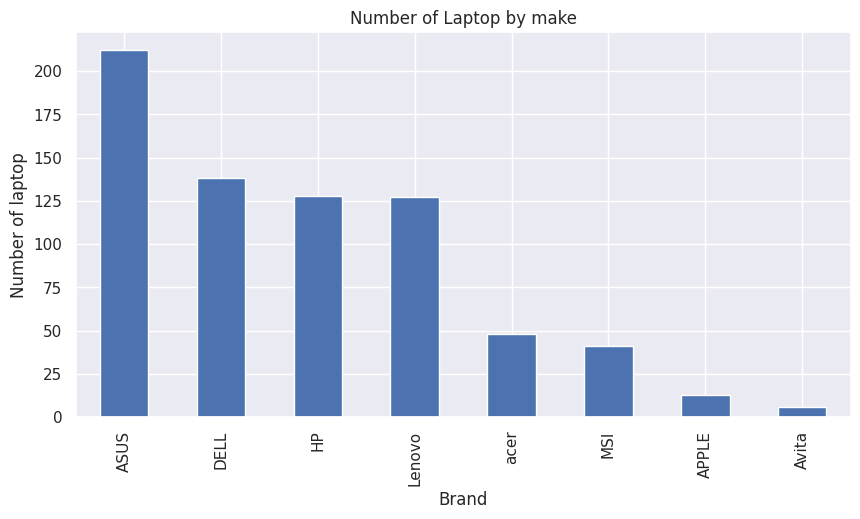

In [ ]:
df.Brand.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Laptop by make")
plt.ylabel('Number of laptop')
plt.xlabel('Brand');

### Scatterplot

Di sini, scatterplot diplot antara Price dan Brand dan kita dapat melihat plot di bawah ini.

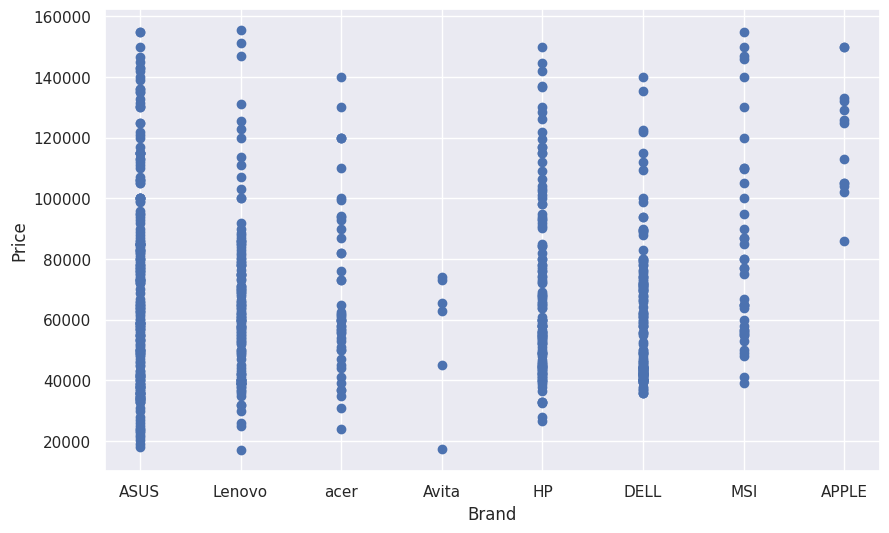

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Brand'], df['Price'])
ax.set_xlabel('Brand')
ax.set_ylabel('Price')
plt.show()